##Exploratory data analysis of TechCorner sales, a retail store in Rangamati, Bangladesh
####https://www.kaggle.com/datasets/shohinurpervezshohan/techcorner-mobile-purchase-and-engagement-data

Summary highlights:
- 66% of customers are local and 25% are repeat (8871 total customers)
- 65% of customers were not through Facebook, nor did FB impact repeat purchases or increase sale price
- 60% of customers had heard of the shop, but that did not impact repeat purchases or significantly increase sale price
- The oldest age bracket bought ~55% more phones than average
- Genders have preferred phone models
- Substantial variance in weekly sales
- A few substantial overpayments for phones


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import store data and initial views

In [2]:
data = pd.read_csv("../data/TechCorner_Sales_update.csv")

In [3]:
data.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


In [ ]:
data.rename(columns={'Cus. Location':'Cus_Location', 'Sell Price':'SellPrice', 'Does he/she Come from Facebook Page?':'from_FB', 'Does he/she Followed Our Page?':'follows_page', 'Did he/she buy any mobile before?':'bought_before', 'Did he/she hear of our shop before?':'heard_of_shop'}, inplace=True)

In [5]:
data.columns

Index(['Cus.ID', 'Date', 'Cus. Location', 'Age', 'Gender', 'Mobile Name',
       'SellPrice', 'from_FB', 'follows_page', 'bought_before',
       'heard_of_shop'],
      dtype='object')

In [6]:
data.describe()

,Cus.ID,Age,SellPrice
count,8871.000000,8871.000000,8871.00000
mean,4436.000000,34.047007,25068.38654
std,2560.981452,9.592612,18032.80271
min,1.000000,18.000000,12702.00000
25%,2218.500000,26.000000,17466.50000
50%,4436.000000,34.000000,21682.00000
75%,6653.500000,42.000000,25777.50000
max,8871.000000,50.000000,200465.00000


no irregular ages or sell prices

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cus.ID         8871 non-null   int64  
 1   Date           8871 non-null   object 
 2   Cus. Location  8871 non-null   object 
 3   Age            8871 non-null   int64  
 4   Gender         8871 non-null   object 
 5   Mobile Name    8871 non-null   object 
 6   SellPrice      8871 non-null   float64
 7   from_FB        8871 non-null   object 
 8   follows_page   8871 non-null   object 
 9   bought_before  8871 non-null   object 
 10  heard_of_shop  8871 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 762.5+ KB


no null values, check for N/A, etc.

In [8]:
df = pd.DataFrame(data)

# Count NaN values in each column
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)


Cus.ID           0
Date             0
Cus. Location    0
Age              0
Gender           0
Mobile Name      0
SellPrice        0
from_FB          0
follows_page     0
bought_before    0
heard_of_shop    0
dtype: int64


In [9]:
# Common placeholders to check
placeholders = ['N/A', 'n/a', 'NA', 'na', 'null', 'NULL', '-', '']

# Find matches in each column
for col in data.select_dtypes(include='object'):
    matches = data[col].isin(placeholders)
    if matches.any():
        print(f"Found placeholder in column '{col}':")
        print(data[col][matches].value_counts())

###Observations

In [ ]:
print("Avg. sell price by location: ", data.groupby("Cus_Location")["SellPrice"].mean())


Avg. sell price by location:  Cus. Location
Inside Rangamati     24866.202484
Outside Rangamati    24852.985333
Rangamati Sadar      25483.034993
Name: SellPrice, dtype: float64


average sell price is slightly higher in Rangamati Sadar - but project will focus on Outside Rangamati vs not

In [11]:
print("Avg. sell price by gender: ", data.groupby("Gender")["SellPrice"].mean())


Avg. sell price by gender:  Gender
F    24838.348529
M    25300.246944
Name: SellPrice, dtype: float64


males spend just slightly more than females on average

In [12]:
pivot = data.pivot_table(
    index='Mobile Name',
    columns='Gender',
    values='SellPrice',
    aggfunc='mean'
)

# Add a new column showing the difference: Female - Male
pivot['price_diff_F-M'] = pivot['F'] - pivot['M']

# Sort by the difference column
pivot_sorted = pivot.sort_values(by='price_diff_F-M', ascending=False)

pivot_sorted

Gender,F,M,price_diff_F-M
Mobile Name,,,
Galaxy S24 Ultra 12/256,32765.221818,29457.263158,3307.958660
R-70 Turbo 5G 6/128,21556.715415,20887.344961,669.370454
Moto G85 5G 8/128,22581.505226,21993.879121,587.626106
Pixel 7a 8/128,26754.165385,26186.903101,567.262284
Vivo T3x 5G 8/128,22140.767176,21603.583333,537.183842
Narzo N53 4/64,18475.334559,17972.736434,502.598125
iQOO Neo 9 Pro 5G 12/256,25990.383399,25561.859438,428.523961
iQOO Z7 5G 6/128,20558.854331,20267.720149,291.134181
Vivo Y200 5G 6/128,21107.678832,20842.674797,265.004035


the genders have their preferred models, with females spending more on Galaxy S24 Ultra and males spending on Pixel 8 Pro and iPhone 16 Pro

In [13]:
print("Avg. sell price by product: ", data.groupby("Mobile Name")["SellPrice"].mean().sort_values(ascending=False))

Avg. sell price by product:  Mobile Name
iPhone 16 Pro Max 1TB       40967.778689
iPhone 16 Pro 256GB         33622.378119
Galaxy S24 Ultra 12/256     31138.757856
Pixel 8 Pro 12/256          29625.450281
Pixel 7a 8/128              26471.629344
Galaxy A55 5G 8/128         26346.226054
iQOO Neo 9 Pro 5G 12/256    25777.828685
Note 14 Pro 5G 8/256        24550.424242
Moto G85 5G 8/128           22295.037500
Redmi Note 12 Pro 8/128     22221.109848
Galaxy M35 5G 8/128         22033.534091
Vivo T3x 5G 8/128           21877.400778
R-70 Turbo 5G 6/128         21218.755382
Vivo Y200 5G 6/128          20982.311538
iQOO Z7 5G 6/128            20409.383142
Note 11S 6/128              19538.154275
Narzo N53 4/64              18230.673585
Name: SellPrice, dtype: float64


iPhone 16 Pro and Pro Max are most expensive while Narzo N53 and and Note 11S are least expensive

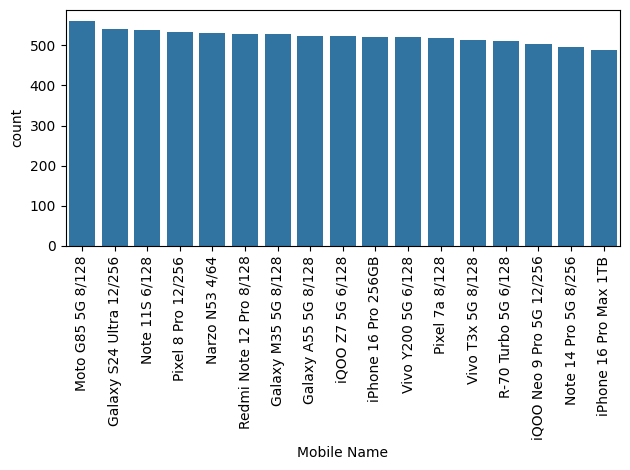

In [14]:
sns.countplot(data, x='Mobile Name', order=data['Mobile Name'].value_counts().index)
plt.xticks(rotation=90)  # or 90 for vertical labels
plt.tight_layout()
plt.show()

most units sold by Moto G85, least for IPhone 16 Pro Max

<Axes: xlabel='SellPrice', ylabel='Count'>

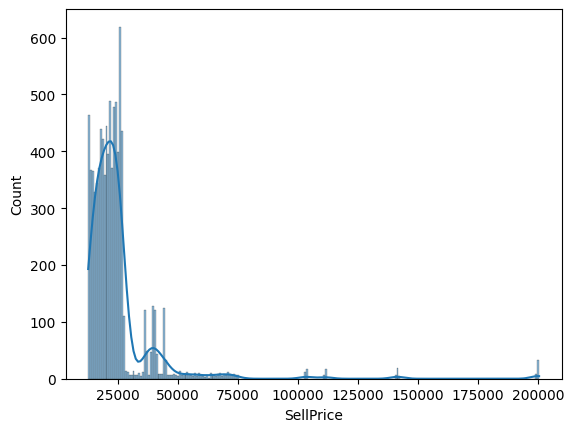

In [15]:
sns.histplot(data['SellPrice'], kde=True)

some outlier purchases of expensive phones

<Axes: xlabel='Gender', ylabel='SellPrice'>

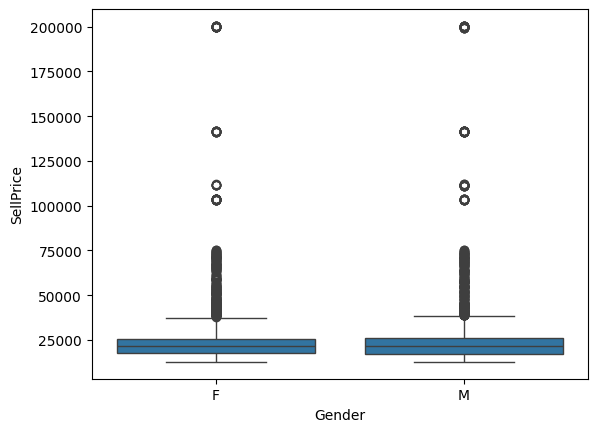

In [16]:
sns.boxplot(data, x='Gender', y='SellPrice')

similar distribution between the genders

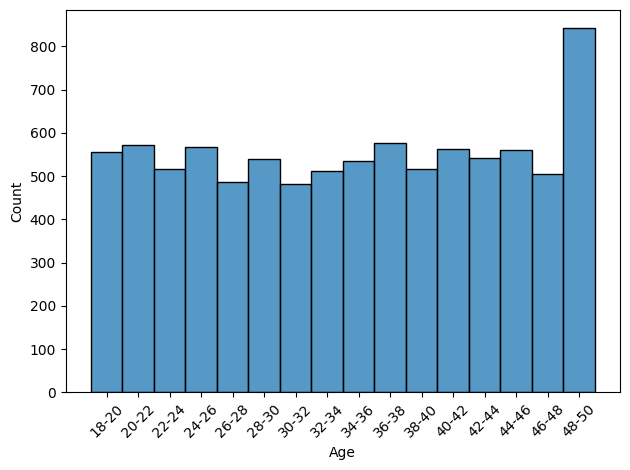

In [17]:
# Define custom bins
bins = np.arange(18, 52, 2)  # e.g., from age 18 to 50 in steps of 2
ax = sns.histplot(data['Age'], bins=bins)

# Set custom x-tick labels at bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]], rotation=45)

plt.tight_layout()
plt.show()


more units sold in the oldest age bracket

<Axes: >

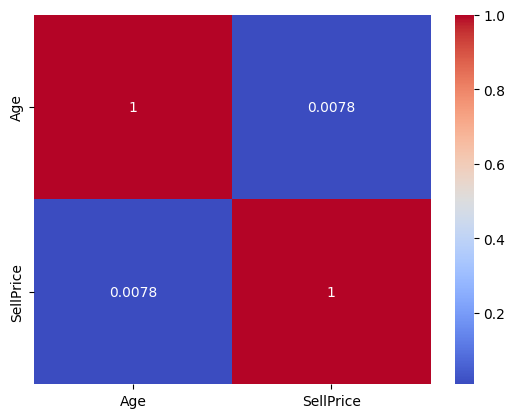

In [18]:
sns.heatmap(data.drop(columns='Cus.ID').corr(numeric_only=True), annot=True, cmap='coolwarm')

but no correlation between age and sell price

<Axes: title={'center': 'Weekly Sales'}, xlabel='Date'>

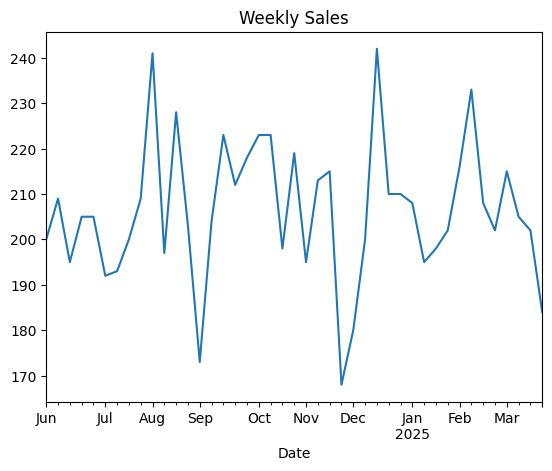

In [19]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst= True)
data.set_index('Date').resample('W').size().plot(title='Weekly Sales')

weekly sales, peaks in early August, mid-December, mid-February, declines in early September, late November, late March

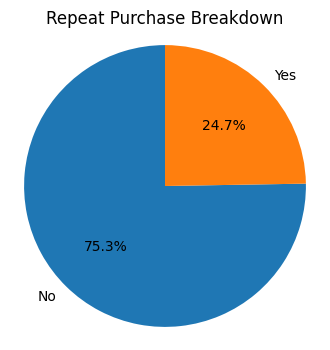

In [20]:
buyers = data['bought_before'].value_counts()

# Plot pie chart with percentage labels
plt.figure(figsize=(4, 4))
plt.pie(buyers, labels=buyers.index, autopct='%1.1f%%', startangle=90)
plt.title('Repeat Purchase Breakdown')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

most customers were not repeat buyers

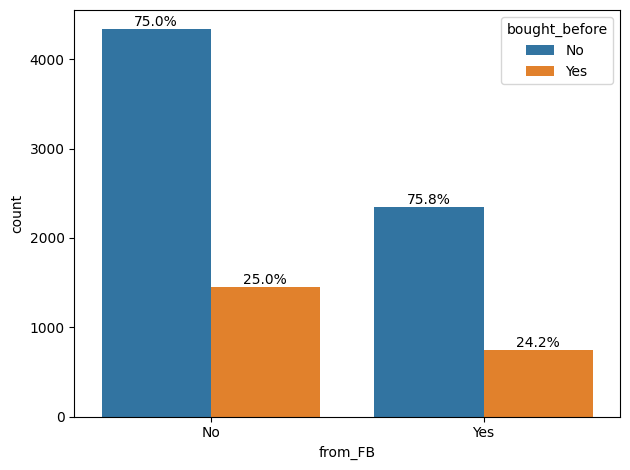

In [21]:
# Create the countplot
ax = sns.countplot(data=data, x='from_FB', hue='bought_before')

# Calculate total counts per 'from FB' group
group_totals = data.groupby('from_FB').size()

# Add percentage labels
for p in ax.patches:
    group = p.get_x() + p.get_width() / 2  # center of bar
    height = p.get_height()
    if height == 0:
        continue  # Skip bars with zero count

    # Extract the x-tick label (group name) for this bar
    group_label = p.get_x() + p.get_width() / 2
    # Get corresponding group name from the tick positions
    group_index = round(p.get_x() + p.get_width() / 2)
    group_name = ax.get_xticklabels()[group_index].get_text()

    # Calculate group-specific percentage
    group_total = group_totals[group_name]
    percent = 100 * height / group_total

    # Add label
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position
        height + 0.5,                   # y position
        f'{percent:.1f}%',              # label text
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

most purchases were not through the Facebook page, but both categories have similar rates of repeat customers

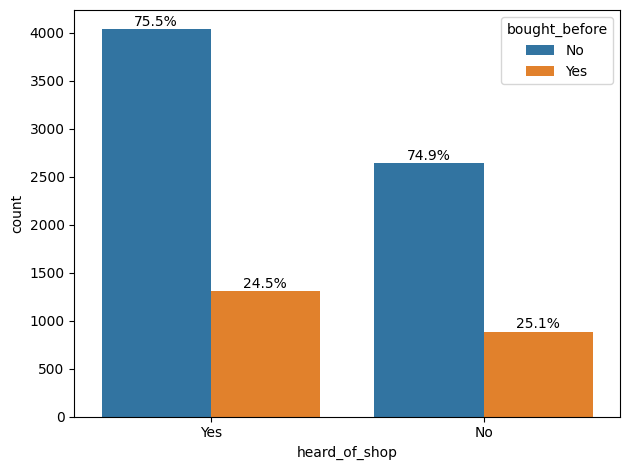

In [22]:
# Create the countplot
ax = sns.countplot(data=data, x='heard_of_shop', hue='bought_before')

# Calculate total counts per 'from FB' group
group_totals = data.groupby('heard_of_shop').size()

# Add percentage labels
for p in ax.patches:
    group = p.get_x() + p.get_width() / 2  # center of bar
    height = p.get_height()
    if height == 0:
        continue  # Skip bars with zero count

    # Extract the x-tick label (group name) for this bar
    group_label = p.get_x() + p.get_width() / 2
    # Get corresponding group name from the tick positions
    group_index = round(p.get_x() + p.get_width() / 2)
    group_name = ax.get_xticklabels()[group_index].get_text()

    # Calculate group-specific percentage
    group_total = group_totals[group_name]
    percent = 100 * height / group_total

    # Add label
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position
        height + 0.5,                   # y position
        f'{percent:.1f}%',              # label text
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

more customers had heard of the shop, but did not have a higher percentage of repeat buyers

<Axes: xlabel='follows_page', ylabel='SellPrice'>

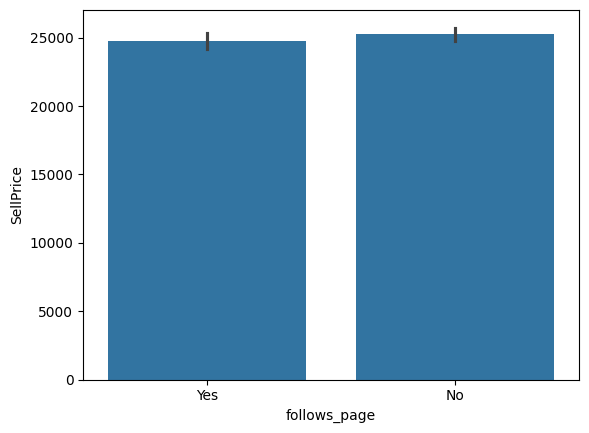

In [23]:
sns.barplot(data, x='follows_page', y='SellPrice')

<Axes: xlabel='follows_page', ylabel='SellPrice'>

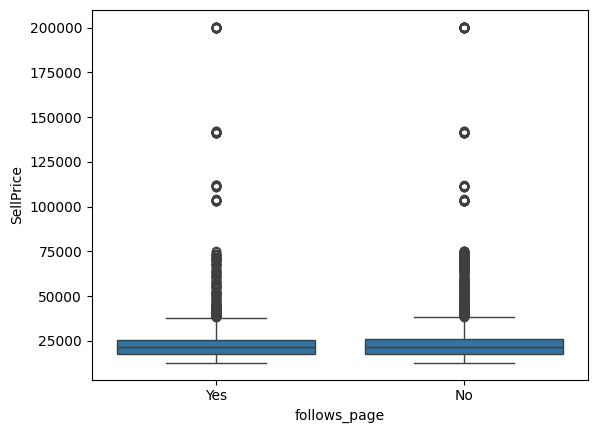

In [24]:
sns.boxplot(data, x='follows_page', y='SellPrice')

following the Facebook page does not appear to increase customer spending

<Axes: xlabel='bought_before', ylabel='SellPrice'>

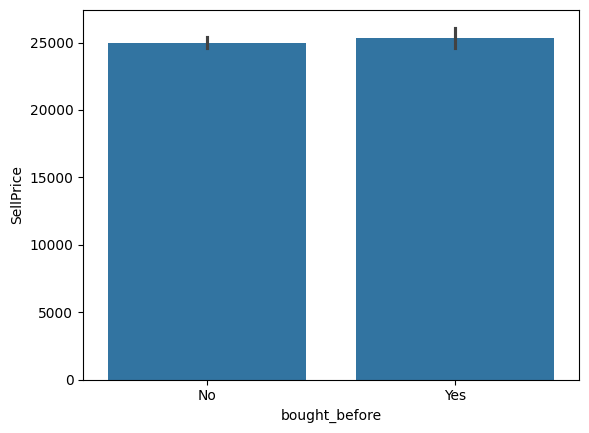

In [25]:
sns.barplot(data, x='bought_before', y='SellPrice')

<Axes: xlabel='bought_before', ylabel='SellPrice'>

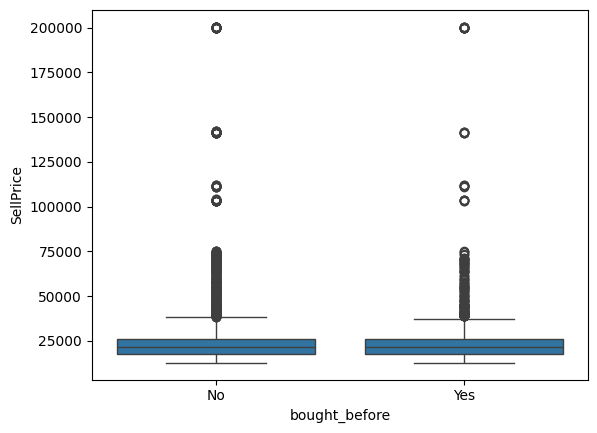

In [26]:
sns.boxplot(data, x='bought_before', y='SellPrice')

similarly, repeat customers do not appear to spend significantly more

###Analyze geographic distribution of customers (local vs. non-local)
'local' will be Rangamati Sadar and Inside Rangamati, 'non-local' is Outside Rangamati

In [27]:
# Define which locations are considered local
local_locations = ['Rangamati Sadar', 'Inside Rangamati']

# Create a new column 'is_local'
data['is_local'] = data['Cus_Location'].apply(lambda x: 1 if x in local_locations else 0)

In [28]:
data.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,SellPrice,from_FB,follows_page,bought_before,heard_of_shop,is_local
0,1,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes,1
1,2,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes,1
2,3,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes,1
3,4,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes,1
4,5,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes,0


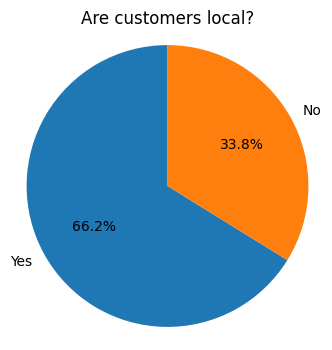

In [29]:
# Map 0/1 to labels
labels_map = {1: 'Yes', 0: 'No'}

locals = data['is_local'].value_counts().rename(index=labels_map)

# Plot pie chart with percentage labels
plt.figure(figsize=(4, 4))
plt.pie(locals, labels=locals.index, autopct='%1.1f%%', startangle=90)
plt.title('Are customers local?')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

encode gender and remaining yes/no columns

In [30]:
data['is_male'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [31]:
# Detect Yes/No columns automatically
yes_no_cols = [col for col in data.columns if set(data[col].dropna().unique()) <= {'Yes', 'No'}]

# Convert them
data[yes_no_cols] = data[yes_no_cols].replace({'Yes': 1, 'No': 0})

C:\Users\ggibs\AppData\Local\Temp\ipykernel_18556\116482526.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_cols] = data[yes_no_cols].replace({'Yes': 1, 'No': 0})


encode phones into separate columns

In [32]:

# One-hot encode multi-category column mobile name
dataset = pd.get_dummies(data, columns=['Mobile Name'], drop_first=True)

In [33]:
# drop Customer ID
dataset.drop(columns='Cus.ID', inplace=True)

In [34]:
# output for modeling notebook
dataset.to_csv("../data/TechCorner_Sales_converted.csv")